## IMPORTING NECESSARY LIBRARIES

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATASET INTO THE NOTEBOOK

In [81]:
df = pd.read_csv(r'C:\Users\nikhil\Downloads\uber_rides_data.xlsx - sample_train.csv')

In [82]:
df

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


    From above we concluded that Integer valued columns are 2,float64 are 5 and object is one i.e. pickup datetime

#### Find the no of null values in each column

In [84]:
df.isna().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

    dropoff_longitude,dropoff_latitude are contains null values and no of null values in both columns are 1

## Drop the null values in the data

In [87]:
df.dropna(inplace=True)

  ### Describe the data to find max,min,count and standard deviation and quartile ranges

In [88]:
df.describe()

,ride_id,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## haversine distance
        The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles.

In [90]:
import math
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    R = 6371.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance
# Calculate Haversine distances for each row in the dataset
df['haversine_distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
# Calculate the median Haversine distance
median_distance = df['haversine_distance'].median()

print(f"Median Haversine Distance: {median_distance} kilometers")

Median Haversine Distance: 2.1209923961833708 kilometers


In [91]:
# Find the maximum Haversine distance
max_distance_trip = df[df['haversine_distance'] == df['haversine_distance'].max()]


In [92]:
max_distance_trip

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
75851,33249845,15.7,2011-11-05 00:22:00 UTC,-1340.64841,1644.421482,-3356.6663,872.697628,1,16409.239135


In [93]:
# Extract the maximum distance and corresponding trip details
max_distance = max_distance_trip['haversine_distance'].values[0]
pickup_lat = max_distance_trip['pickup_latitude'].values[0]
pickup_lon = max_distance_trip['pickup_longitude'].values[0]
dropoff_lat = max_distance_trip['dropoff_latitude'].values[0]
dropoff_lon = max_distance_trip['dropoff_longitude'].values[0]

print(f"Maximum Haversine Distance: {max_distance} kilometers")
print(f"Pickup Location (Lat, Lon): ({pickup_lat}, {pickup_lon})")
print(f"Dropoff Location (Lat, Lon): ({dropoff_lat}, {dropoff_lon})")

Maximum Haversine Distance: 16409.239135313168 kilometers
Pickup Location (Lat, Lon): (1644.421482, -1340.64841)
Dropoff Location (Lat, Lon): (872.697628, -3356.6663)


In [94]:
zero_distance_rides = df[df['haversine_distance'] == 0.0]
num_zero_distance_rides = len(zero_distance_rides)

print(f"Number of rides with 0.0 Haversine distance: {num_zero_distance_rides}")

Number of rides with 0.0 Haversine distance: 5632


### mean fare amount between haversine distance=0

In [69]:
mean_fare_amount_for_zero_distance_rides = zero_distance_rides['fare_amount'].mean()

print(f"Mean fare amount for rides with 0.0 Haversine distance: {mean_fare_amount_for_zero_distance_rides}")

Mean fare amount for rides with 0.0 Haversine distance: 11.585317826704546


### maximum fare amount for a ride

In [95]:
df['fare_amount'].max()

499.0

### Haversine Distance for the Costliest Ride:

In [96]:
# Find the row with the highest fare amount
costliest_ride = df[df['fare_amount'] == df['fare_amount'].max()]

# Extract the pickup and dropoff coordinates for the costliest 
pickup_lat = costliest_ride['pickup_latitude'].values[0]
pickup_lon = costliest_ride['pickup_longitude'].values[0]
dropoff_lat = costliest_ride['dropoff_latitude'].values[0]
dropoff_lon = costliest_ride['dropoff_longitude'].values[0]
costliest_ride_distance = haversine(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)

print(f"Haversine Distance for the Costliest Ride: {costliest_ride_distance} kilometers")


Haversine Distance for the Costliest Ride: 0.0007899213191009994 kilometers


In [100]:
# Assuming your timestamp column is in datetime format, if not, you may need to convert it first.
df['timestamp'] = pd.to_datetime(df['pickup_datetime'])

# Specify the year you're interested in (e.g., 2014)
target_year = int(input('Enter the year beween 2009 to 2015 '))

# Filter the rides for the specified year
rides_in_target_year = df[df['timestamp'].dt.year == target_year]

# Count the number of rides in the specified year
num_rides_in_target_year = len(rides_in_target_year)

print(f"Number of rides recorded in {target_year}: {num_rides_in_target_year}")

Enter the year beween 2009 to 2015 2014
Number of rides recorded in 2014: 29968


In [101]:

# Define the start and end dates for the first quarter of 2014
start_date = '2014-01-01'
end_date = '2014-03-31'

# Filter the rides for the first quarter of 2014
rides_in_first_quarter_2014 = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
# Count the number of rides in the first quarter of 2014
num_rides_in_first_quarter_2014 = len(rides_in_first_quarter_2014)

print(f"Number of rides recorded in the first quarter of 2014: {num_rides_in_first_quarter_2014}")


Number of rides recorded in the first quarter of 2014: 7617


### Finding the maximum ridings in which week day

In [102]:
# Assuming your timestamp column is in datetime format, if not, you may need to convert it first.
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter the dataset to include only rides in September 2010
rides_in_september_2010 = df[(df['timestamp'].dt.year == 2010) & (df['timestamp'].dt.month == 9)]

# Group the data by day of the week and count the number of rides for each day
rides_by_day_of_week = rides_in_september_2010['timestamp'].dt.day_name().value_counts()
# Find the day of the week with the maximum ride count
max_rides_day = rides_by_day_of_week.idxmax()
max_rides_count = rides_by_day_of_week[max_rides_day]

print(f"On {max_rides_day} in September 2010, the maximum number of rides ({max_rides_count} rides) were recorded.")


On Thursday in September 2010, the maximum number of rides (457 rides) were recorded.


In [105]:
# Convert 'pickup_datetime' column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract the day of the week as a string (e.g., Monday, Tuesday, etc.)
df['pickup_week_day'] = df['pickup_datetime'].dt.strftime('%A')


In [106]:
df

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,timestamp,pickup_datetimes,pickup_week_day
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015-05-07 19:52:06+00:00,2015-05-07 19:52:06+00:00,Thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009-07-17 20:04:56+00:00,2009-07-17 20:04:56+00:00,Friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009-08-24 21:45:00+00:00,2009-08-24 21:45:00+00:00,Monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009-06-26 08:22:21+00:00,2009-06-26 08:22:21+00:00,Friday
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014-08-28 17:47:00+00:00,2014-08-28 17:47:00+00:00,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,2012-10-28 10:49:00+00:00,2012-10-28 10:49:00+00:00,Sunday
199996,16382965,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,2014-03-14 01:09:00+00:00,2014-03-14 01:09:00+00:00,Friday
199997,27804658,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,2009-06-29 00:42:00+00:00,2009-06-29 00:42:00+00:00,Monday
199998,20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,3.539715,2015-05-20 14:56:25+00:00,2015-05-20 14:56:25+00:00,Wednesday


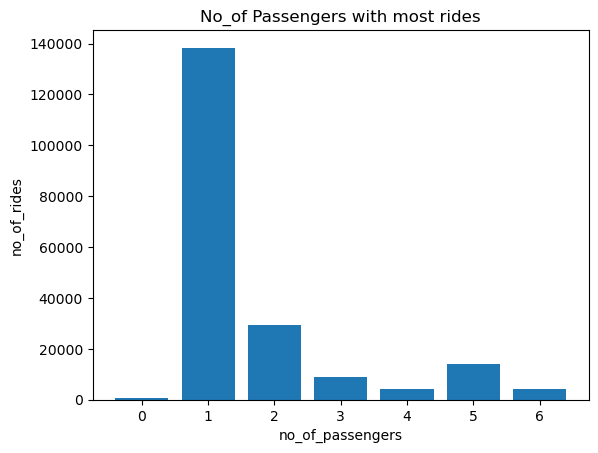

In [118]:
x=df['passenger_count'].value_counts()[:7]
y=df['passenger_count'].value_counts()[:7].index
plt.xlabel("no_of_passengers")
plt.ylabel("no_of_rides")
plt.title("No_of Passengers with most rides")
plt.bar(y,x)
plt.show()

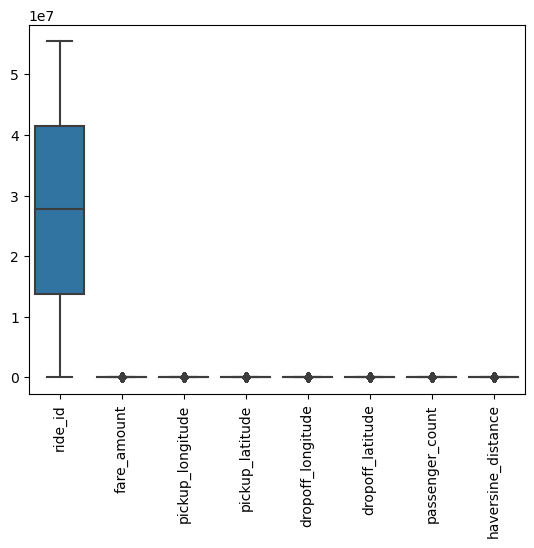

In [125]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

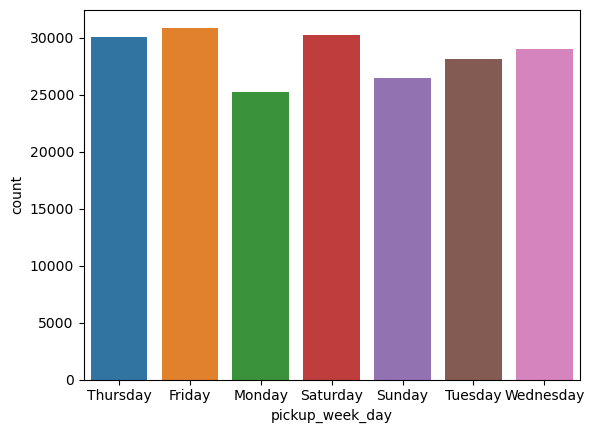

In [137]:
sns.countplot(data=df,x='pickup_week_day')
plt.show()

### Finding best ML model

In [107]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Select relevant features and target
X = df[['passenger_count', 'haversine_distance', 'pickup_week_day']]
y = df['fare_amount']

# Convert ride_week_day to categorical data (e.g., Monday, Tuesday, etc.)
X['pickup_week_day'] = X['pickup_week_day'].astype('category')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a transformer to handle categorical features (one-hot encoding)
categorical_features = ['pickup_week_day']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor that applies transformations to the data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize models
linear_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', LinearRegression())])

decision_tree_model = DecisionTreeRegressor(random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)

knn_model = KNeighborsRegressor()

# List of models
models = [linear_reg_model, decision_tree_model, random_forest_model, knn_model]

# Initialize variables to store results
best_model = None
best_adj_r2 = float('-inf')

# Train and evaluate each model
for model in models:
    # If the model is not linear regression, apply preprocessing
    if model != linear_reg_model:
        model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate R-squared value
    r2 = r2_score(y_test, y_pred)

    # Calculate adjusted R-squared value
    n = len(y_test)
    p = X_test.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Update best model if necessary
    if adj_r2 > best_adj_r2:
        best_adj_r2 = adj_r2
        best_model = model

print(f"Best Model (adjusted R-squared): {best_model}")
print(f"Adjusted R-squared: {best_adj_r2}")


Best Model (adjusted R-squared): Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pickup_week_day'])])),
                ('regressor', LinearRegression())])
Adjusted R-squared: 0.00035187985887363826


In [144]:
import os 
os.getcwd()

'C:\\Users\\nikhil'